In [1]:
import numpy as np
import matplotlib.pyplot as plt
import copy
np.set_printoptions(precision=2)
from pathlib import Path

import wave as w
import constants as c
import material as m
import propagation as p
import style


# Example usage of simulated materials
This notebook is ment as an reference on how to use `PlaneWave` and `Material` classes,
and for visual test of the implementation.

In [2]:
figures_dir = "figures_reflection/"
Path(figures_dir).mkdir(parents=True, exist_ok=True)

### Generate an example spectrum
Just an example how to create and plot wave.

In [3]:
s = w.GaussianPlanarWave(mean=c.GREEN, std=(5*c.MICRO))
s_replay = w.WhitePlanarWave()
z = np.linspace(-6*c.MICRO, 6*c.MICRO, 1000)
s.delay(0)

### Compare different materials

#### Analitical vs constant vs matrix theory
Create the same material (empty space) using three different material models in oder to inspect that they give the same resut.

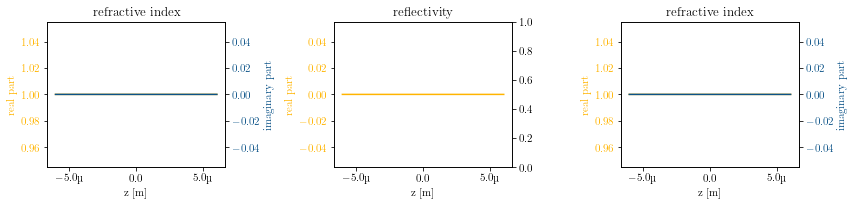

In [4]:
air = m.EmptySpace(z=z, name="analytic")
common_n = 1
plate = m.PhotoSensitiveMaterial(z=z, r=0, name="transfer matrices")
dielectric = m.SimpleDielectric(z=z, n0=1, name="transfer matrices")

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(12, 3))

air.plot(ax1, imaginary_axis=ax1.twinx())
plate.plot(ax2, imaginary_axis=ax2.twinx())
dielectric.plot(ax3, imaginary_axis=ax3.twinx())
fig.tight_layout() 
plt.show()

Calculate interference pattern in those three materials: again we can see that the patterns match. 
The index of refraction after recording would be different in those materials because ConstantMaterial's index of refraction cannot be modified.

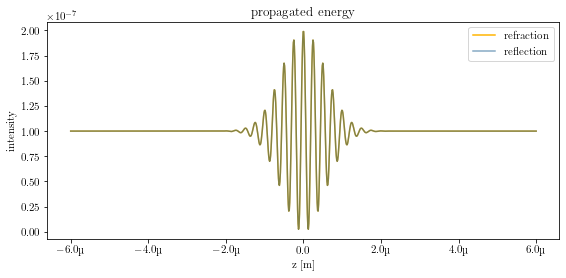

In [5]:
fig, (ax1) = plt.subplots(1, 1, figsize=(8,4))

dielectric.record(s,s)
dielectric.plot_recent_energy(ax1, label="refraction")
plate.record(s,s)
plate.plot_recent_energy(ax1, label="reflection", alpha=0.5)
ax1.legend()
plt.show()

### An example recording

Left: interference pattern 
created in the material. Middle: index of 
refraction after recording. Right: reflected pulse, when the 
incoming pulse was the same as the recorded.

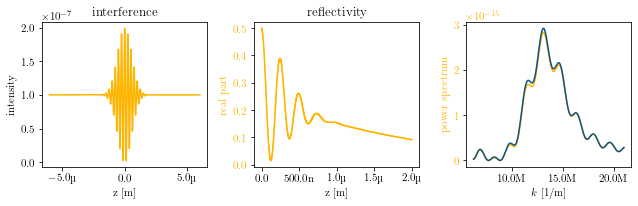

In [6]:
Z_max = 2*c.MICRO
z = np.linspace(0, Z_max, 1000)
plate = m.PhotoSensitiveMaterial(z=z, total_ref=c.NANO, r=0, name="transfer matrices", attenuation=1/Z_max)
s0 = w.GaussianPlanarWave(mean=c.GREEN, std=(3*c.MICRO), energy=c.SINGLE_PULSE_ENERGY * 5)
s1 = w.GaussianPlanarWave(mean=c.GREEN, std=(3*c.MICRO), energy=c.SINGLE_PULSE_ENERGY * 5)
s1.shift(z=-Z_max)
plate.record(s0, s1)
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(9, 3))
dielectric.plot_recent_energy(ax1)
ax1.set_title("interference")
plate.plot(ax=ax2)
plate.reflect(s_replay).plot(ax3, wavelength=False)
approximate = plate.approximate_reflect(s_replay)
ax3.plot(s_replay.k, np.abs(approximate.s)**2)
plt.tight_layout()
plt.savefig(figures_dir + "recording.pdf", transparent=True)
plt.show()

1e-05
0.0001
0.001


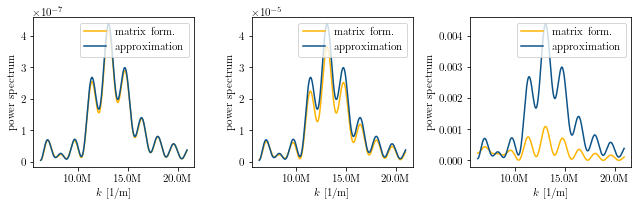

In [7]:
Z_max = 2*c.MICRO
z = np.linspace(0, Z_max, 1000)
fig, axes = plt.subplots(1, 3, figsize=(9, 3))
reflectivity = [1e-5, 1e-4, 1e-3]
s0 = w.GaussianPlanarWave(mean=c.GREEN, std=(3*c.MICRO), energy=c.SINGLE_PULSE_ENERGY * 5)
s1 = w.GaussianPlanarWave(mean=c.GREEN, std=(3*c.MICRO), energy=c.SINGLE_PULSE_ENERGY * 5)
s1.shift(z=-Z_max)

for ax, ref in zip(axes, reflectivity):
    print(ref)
    plate = m.PhotoSensitiveMaterial(z=z, total_ref=ref, r=0, name="transfer matrices")
    plate.record(s0, s1)
    plate.reflect(s_replay).plot(ax, wavelength=False)
    approximate = plate.approximate_reflect(s_replay)
    ax.plot(s_replay.k, np.abs(approximate.s)**2)
    ax.legend(["matrix form.", "approximation"])
    ax.tick_params(axis='y', labelcolor="k")
    ax.set_ylabel("power spectrum", color="k")
    

plt.tight_layout()
plt.savefig(figures_dir + "approximation.pdf", transparent=True)
plt.show()

1e-05
0.0001
0.001


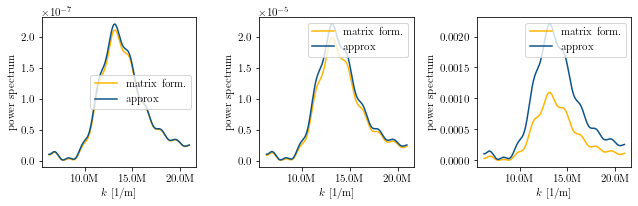

In [8]:
Z_max = 2*c.MICRO
z = np.linspace(0, Z_max, 1000)
fig, axes = plt.subplots(1, 3, figsize=(9, 3))
reflectivity = [1e-5, 1e-4, 1e-3]
s0 = w.GaussianPlanarWave(mean=c.GREEN, std=(3*c.MICRO), energy=c.SINGLE_PULSE_ENERGY * 5)
s1 = w.GaussianPlanarWave(mean=c.GREEN, std=(3*c.MICRO), energy=c.SINGLE_PULSE_ENERGY * 5)
s1.shift(z=-Z_max)

for ax, ref in zip(axes, reflectivity):
    print(ref)
    plate = m.PhotoSensitiveMaterial(z=z, total_ref=ref, r=0, name="transfer matrices", attenuation=2/Z_max)
    plate.record(s0, s1)
    plate.reflect(s_replay).plot(ax, wavelength=False)
    approximate = plate.approximate_reflect(s_replay)
    ax.plot(s_replay.k, np.abs(approximate.s)**2)
    ax.legend(["matrix form.", "approx"])
    ax.tick_params(axis='y', labelcolor="k")
    ax.set_ylabel("power spectrum", color="k")
    

plt.tight_layout()
plt.savefig(figures_dir + "approximation_attenuated.pdf", transparent=True)
plt.show()

## Figure for TSP

In [ ]:
Z_max = 3*c.MICRO
z = np.linspace(0, Z_max, 1000)
fig, axes = plt.subplots(1, 2)
reflectivity = [1e-5, 1e-4]
s0 = w.GaussianPlanarWave(mean=550*c.NANO, std=(4*c.MICRO), energy=c.SINGLE_PULSE_ENERGY * 5)
s1 = w.GaussianPlanarWave(mean=550*c.NANO, std=(4*c.MICRO), energy=c.SINGLE_PULSE_ENERGY * 5)
s1.shift(z=-Z_max)

for ax, ref in zip(axes, reflectivity):
    print(ref)
    plate = m.PhotoSensitiveMaterial(z=z, total_ref=ref, r=0, name="transfer matrices")
    print(plate.max_dr*(z[-1]-z[0]))
    plate.record(s0, s1)
    exact = plate.reflect(s_replay)
    approximate = plate.approximate_reflect(s_replay)
    ax.plot(s_replay.wavelength()/c.NANO, np.abs(approximate.s)**2, c="gray")
#     exact.plot(ax, wavelength=True)
    ax.plot(s_replay.wavelength()/c.NANO, np.abs(exact.s)**2)
    ax.legend(["approx.", "true"])
    ax.tick_params(axis='y', labelcolor="k")
    ax.set_ylabel("power spectrum", color="k")
    ax.get_yaxis().set_visible(False)
    ax.ticklabel_format(axis='y', style='sci', scilimits=(0,0))
    ax.set_xlabel("\(\lambda [\)nm\(]\)")

plt.tight_layout(pad=0.3)
plt.savefig(figures_dir + "approximation.pdf", transparent=True)
plt.show()

1e-05
0.009990000000000002
0.0001
0.0999
